This solution does not use sklearn regression model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

In [9]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X ** 6 - 0.5 * X ** 5 + 2 * X ** 4 - 5 * X ** 3 + 3 * X ** 2 - 10 * X + noise
    
    return X, y

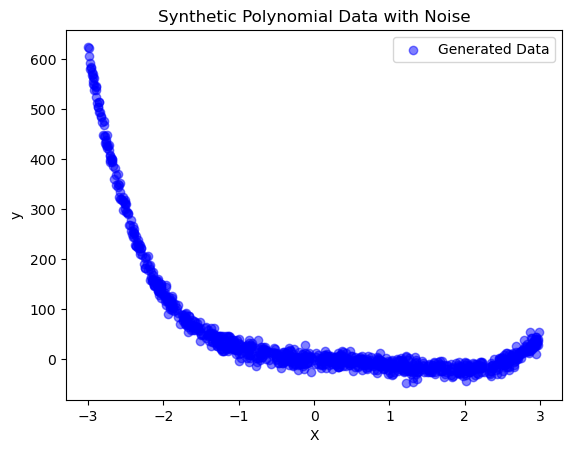

In [10]:
X, y = generate_dataset(-3, 3)
fig, ax = plt.subplots()
ax.scatter(X, y, color='b', alpha=0.5, label='Generated Data')
ax.set(
    xlabel='X',
    ylabel='y',
    title='Synthetic Polynomial Data with Noise'
)
plt.legend()
plt.show()

# TODO: Visualize the dataset using scatter


In [58]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_test_in, y_train, y_test_in = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate the out-of-range testing set
X_out, y_out = generate_dataset(5, 7)
_, X_test_out, _, y_test_out = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

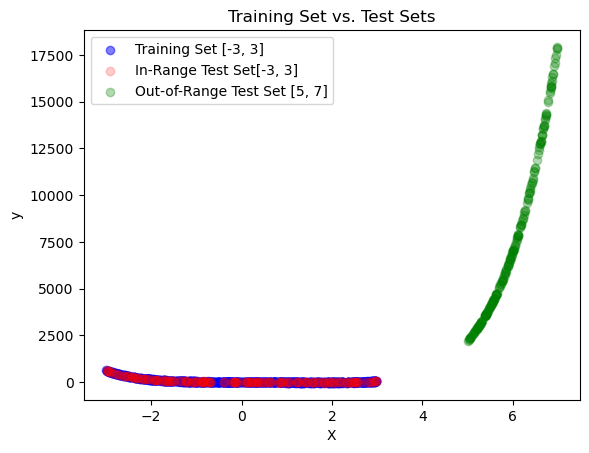

In [117]:
# TODO: Visualize the sets using scatter (or other plots)
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, color='b', alpha=0.5, label='Training Set [-3, 3]')
ax.scatter(X_test_in, y_test_in, color='r', alpha=0.2, label='In-Range Test Set[-3, 3]')
ax.scatter(X_test_out, y_test_out, color='g', alpha=0.3, label='Out-of-Range Test Set [5, 7]')
ax.set(
    xlabel='X',
    ylabel='y',
    title='Training Set vs. Test Sets'
)
ax.legend()
plt.show()

In [ ]:
# Without using sklearn
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    n = X.shape[0]
    X_poly = np.c_[np.ones(n), X]
    for i in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** i]

    XTX = np.matmul(X_poly.T, X_poly)
    XTy = np.matmul(X_poly.T, y)

    model = np.matmul(np.linalg.inv(XTX), XTy)

    return model

In [27]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)

In [ ]:
# Without using sklearn
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    for degree, weights in models.items():
        X_test_eng = np.power.outer(X_test, np.arange(degree + 1))
        losses[degree] = np.mean(
            (y_test - np.matmul(X_test_eng, weights)) ** 2)

    return losses

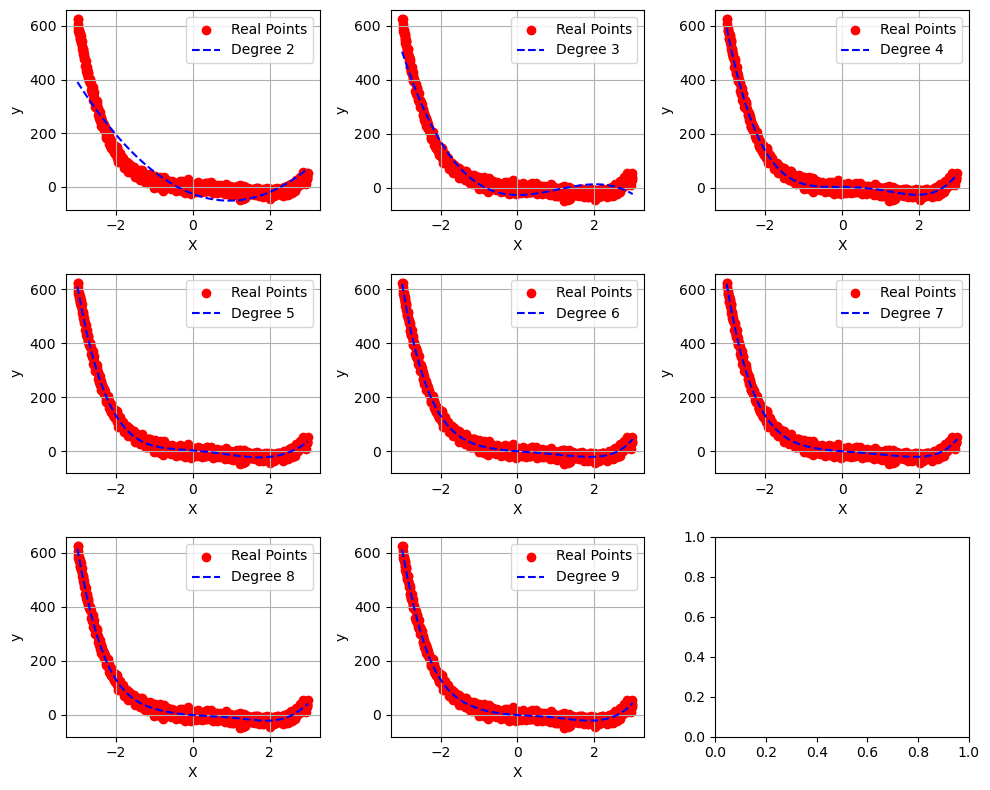

In [121]:
def generate_models(models, X):
    pred = {}
    for degree, weights in models.items():
        X_test_eng = np.power.outer(X, np.arange(degree + 1))
        pred[degree] = np.matmul(X_test_eng, weights)

    return pred

X_fig = np.linspace(-3, 3, 50)
pred = generate_models(models, X_fig)
fig, ax = plt.subplots(3, 3, figsize=(10, 8))

deg = 2
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X, y, color='r', label='Real Points')
        ax[i, j].plot(X_fig, pred[deg], color='b', linestyle='--', label=f'Degree {deg}')
        ax[i, j].set(
                xlabel='X',
                ylabel='y')
        ax[i, j].legend()
        ax[i, j].grid()
        deg += 1
        if deg > 9:
            break

plt.tight_layout()
plt.show()


In [ ]:
# TODO: Evaluate models on both the train and the test sets.
losses_train = evaluate_models(models, X_train, y_train)
losses_in = evaluate_models(models, X_test_in, y_test_in)
losses_out = evaluate_models(models, X_test_out, y_test_out)

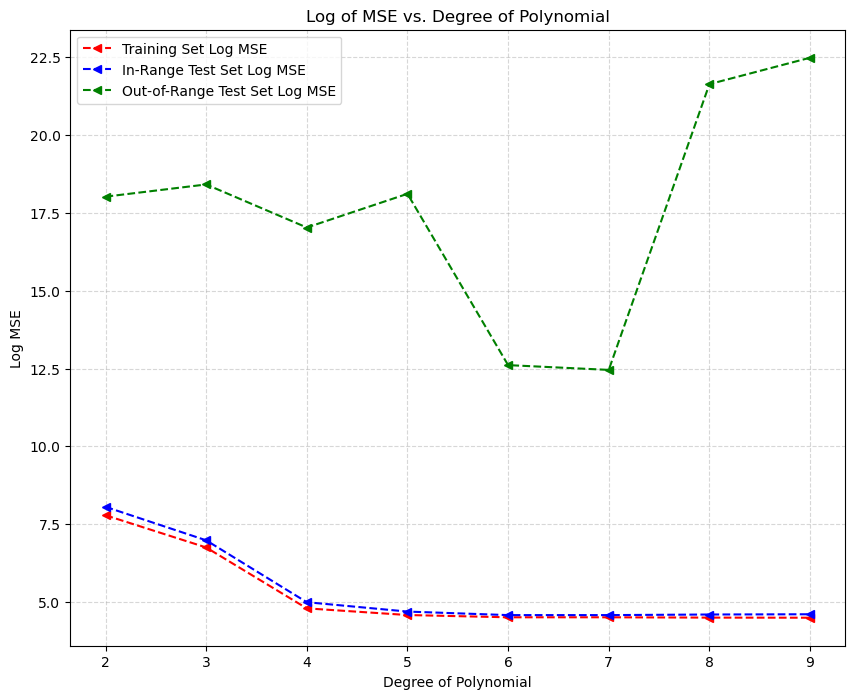

In [ ]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losses_train = np.log1p(list(losses_train.values()))
log_lesses_in = np.log1p(list(losses_in.values()))
log_lesses_out = np.log1p(list(losses_out.values()))
# TODO: Plot the log MSE results
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(losses_train.keys(), log_losses_train, color='r', marker='<', linestyle='--', label='Training Set Log MSE')
ax.plot(losses_in.keys(), log_lesses_in, color='b', linestyle='--', marker='<', label='In-Range Test Set Log MSE')
ax.plot(losses_out.keys(), log_lesses_out, color='g', linestyle='--', marker='<', label='Out-of-Range Test Set Log MSE')
ax.set(
    xlabel='Degree of Polynomial',
    ylabel='Log MSE',
    title='Log of MSE vs. Degree of Polynomial'
)
ax.legend()
ax.grid(linestyle='--', alpha=0.5)
plt.show()

In [78]:
# TODO: Print each model loss on the training and the two test sets
for i in range(degree - 1):
    print(f'Degree: {i + 2} \t Train Log of MSE: {log_losses_train[i]:0.2f} \t In-Range Test Log of MSE: {log_lesses_in[i]:0.2f} \t Out-of-Range Log of MSE: {log_lesses_out[i]:0.2f}' 
)

Degree: 2 	 Train Log of MSE: 7.79 	 In-Range Test Log of MSE: 8.06 	 Out-of-Range Log of MSE: 18.02
Degree: 3 	 Train Log of MSE: 6.75 	 In-Range Test Log of MSE: 6.98 	 Out-of-Range Log of MSE: 18.41
Degree: 4 	 Train Log of MSE: 4.79 	 In-Range Test Log of MSE: 4.99 	 Out-of-Range Log of MSE: 17.03
Degree: 5 	 Train Log of MSE: 4.58 	 In-Range Test Log of MSE: 4.69 	 Out-of-Range Log of MSE: 18.11
Degree: 6 	 Train Log of MSE: 4.51 	 In-Range Test Log of MSE: 4.58 	 Out-of-Range Log of MSE: 12.61
Degree: 7 	 Train Log of MSE: 4.51 	 In-Range Test Log of MSE: 4.58 	 Out-of-Range Log of MSE: 12.46
Degree: 8 	 Train Log of MSE: 4.50 	 In-Range Test Log of MSE: 4.60 	 Out-of-Range Log of MSE: 21.64
Degree: 9 	 Train Log of MSE: 4.49 	 In-Range Test Log of MSE: 4.61 	 Out-of-Range Log of MSE: 22.49


1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** 
As expected, with increasing polynomial degrees, the model error for both training data and in-range test data decreases. But, the error for out-of-range test data set shows oscillatory behavior. This demonstrates the bias-variance tradeoff: lower bias (better training fit) results in higher variance (poor generalization to unseen data). The challenge is finding a balance where the model performs well on both the training and test sets.
</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:**
Higer-degree polynomials increase the complexity of the model tending to capture points as much as possible. This leads to overfitting in which the model appears to have memorized training dataset. While the model behaves approperiately on in-range test dataset, the performance of the model has dropped significantly. This shows that an overly complex model generalize poorly. The best degree is one that balances omplexity, fitting well without overfitting.
</span>